In [22]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [23]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=3

In [24]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'Images/Training',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2870 files belonging to 4 classes.


In [25]:
class_names=dataset.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [26]:
len(dataset)

90

In [27]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 1 0 1 0 1 2 1 0 0 3 0 3 2 0 1 0 3 3 2 1 3 2 1 3 0 1 3 1 1 2]


2024-09-13 21:55:56.897996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-09-13 22:04:12.671660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


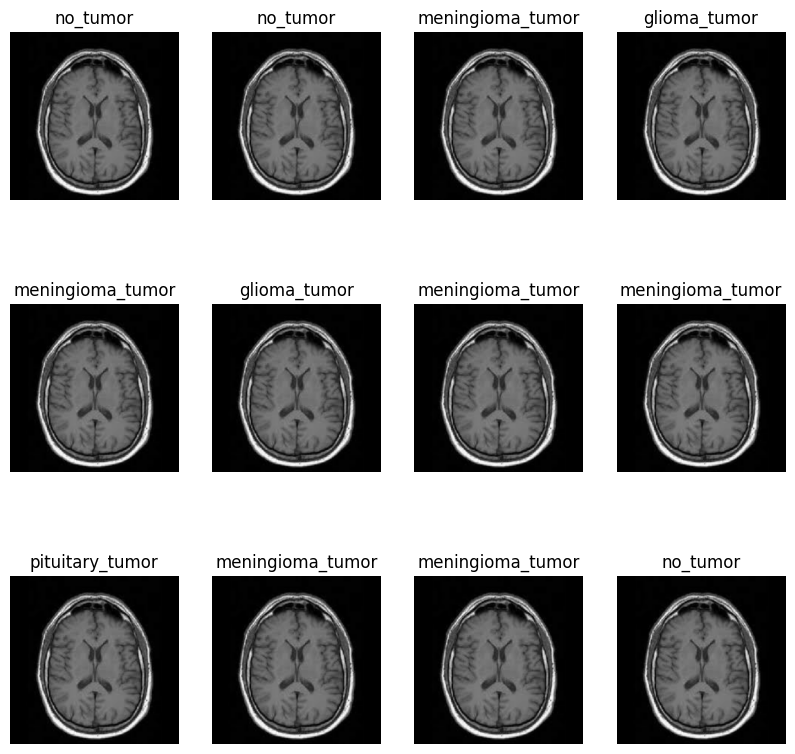

In [34]:
plt.figure(figsize=(10,10))

for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [43]:
def get_dataset_splts(ds,train_split=0.9,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=42)
    train_size=int(train_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size)
    


    return train_ds,val_ds

In [47]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    'Images/Testing',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 394 files belonging to 4 classes.


In [44]:
train_ds,val_ds=get_dataset_splts(dataset)

In [45]:
len(train_ds)

81

In [46]:
len(val_ds)

9

In [48]:
len(test_ds)

13

In [49]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [52]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

In [65]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes=4
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

ValueError: Sequential model 'sequential_2' has no defined input shape yet.